### Objetivos deste projeto

- Apresentar duas formas de treinamento de um modelo de Regressão Linear
    - Closed-form (em outras palavra, há uma equação matemática que calcula o valor)
    - Otimização iterativa (Gradiente Descendente)
- Regressão Polinomial
- Técnicas de Regularização e Curvas de Aprendizado
- Regressão Logística
- Regressão Softmax

### Regressão Linear

A equação da regressão linear é representada por:

$ Y = \beta_0 + \beta_1 X + \epsilon $

Onde:
- $ Y $ é a variável dependente (ou resposta)
- $ X $ é a variável independente (ou preditora)
- $ \beta_0 $ é o coeficiente de interceptação (ou constante)
- $ \beta_1 $ é o coeficiente angular (ou coeficiente da variável independente)
- $ \epsilon $ é o erro aleatório

### Mean Square Error (MSE)

O Mean Square Error (MSE) é a função de custo do modelo de Regressão Linear, o treinamento do modelo ocorre com a diminuição do MSE. calculado pela seguinte equação: 
 
$ MSE = \frac{1}{n} \Sigma_{i=1}^n({Y_{i}}-\hat{Y_{i}})^2 $ 

Onde:

- $ MSE $ é o Mean Square Error (Erro Quadrático Médio)
- $ n $ é o número de observações
- $ Y_{i} $  é o valor observado da variável dependente para a i-ésima observação
- $ \hat{Y_{i}} $ é o valor previsto da variável dependente para a i-ésima observação

### Equação Normal

- A equação normal é uma solução fechada (Closed-form) usada para encontrar o valor de `θ` que minimiza a função de custo. Outra maneira de descrever a equação normal é como um algoritmo de `um passo` usado para encontrar analiticamente os coeficientes que minimizam a função de perda (Loss Function).
- A Equação Normal é uma abordagem analítica à Regressão Linear com uma Função de Custo Mínimo Quadrado (Least Square Cost Function). Podemos usar a Equação Normal para calcular diretamente os parâmetros de um modelo que minimiza a soma da diferença quadrada entre o termo real e o termo previsto. Este método é bastante útil quando o conjunto de dados é pequeno. No entanto, com um grande conjunto de dados, pode não ser possível fornecer o melhor parâmetro do modelo.

#### Fórmula de Equação Normal

A fórmula da Equação Normal é representada matematicamente como:

$ \theta = (X^T X)^{-1} X^T y $

onde:
- $\theta$ é o vetor de parâmetros da regressão,
- $X$ é a matriz de características, onde cada linha representa uma observação e cada coluna representa uma característica,
- $y$ é o vetor de valores alvo.

Esta fórmula nos dá os valores ideais dos parâmetros $\theta$ que minimizam a soma dos quadrados dos resíduos.

Esta fórmula pode ser usada para calcular os parâmetros da regressão linear quando se tem um conjunto de dados $X$ e $y$.

#### Complexidade
- A complexidade do treinamento do algoritmo aumenta à medida que aumenta o número de instâncias e características, isso torna inviável para bases de dados grandes.
- As predições tem complexidade linear.

In [11]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
# gera números entre 0 e 2 de uma distribuição normal
X = 2 * np.random.rand(100, 1)

# representando a Equação da Reta
y = 4 + 3 * X + np.random.randn(100, 1)

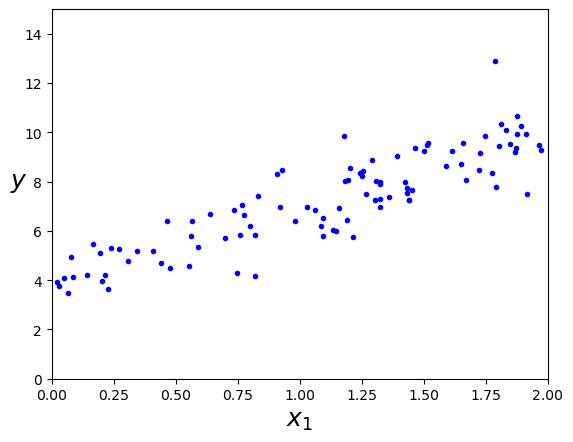

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [17]:
# adiciona 1 (um) em cada instancia
X_b = np.c_[np.ones((100, 1)), X]  

# np.linalg.inv: calcula a matriz inversa
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [18]:
theta_best

array([[3.88446741],
       [3.03935335]])

In [25]:
# mostrando como fica a saida para o seguinte comando
np.ones((2, 1))

array([[1.],
       [1.]])

In [19]:
X_new = np.array([[0], [2]])
# adiciona 1 (um) em cada instancia
X_new_b = np.c_[np.ones((2, 1)), X_new] 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.88446741],
       [9.96317411]])

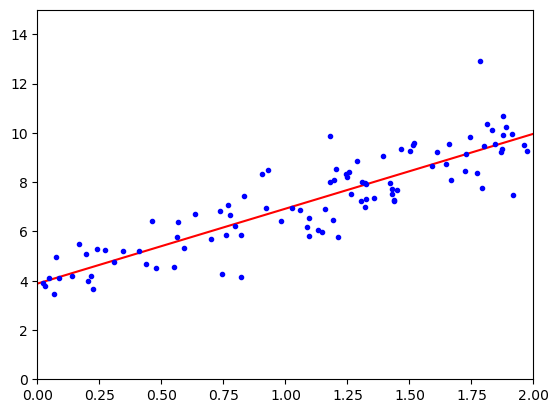

In [20]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Gradiente Descendente

- Gradiente é uma variação de grandeza, numa determinada direção, tendo em conta sua dimensão espacial
- Gradiente Descedente é um algoritmo de otimização usado para minimizar algumas funções movendo-se iterativamente na direção da descida mais íngreme, conforme definido pelo negativo do gradiente.
- O algoritmo funciona da seguinte forma:
    - O vetor de pesos $\theta$ é iniciado com valores aleatórios
    - É calculado o gradiente local da função erro em relação ao $\theta$
    - O $\theta$ é atualizado em direção ao Gradiente Descendente
    - A atualização de $\theta$ é um parâmetro do algortimo e é chamado de taxa de aprendizagem
        - Uma taxa de aprendizagem baixa pode tornar o algoritmo muito lento, enquanto uma taxa alta pode fazer passar do valor mínimo, às vezes aumentando o erro ao invés de diminuir
        - Nas duas situações pode impedir o algoritmo de encontrar um valor ótimo global
    - Ela ocorre forma iterativa e com pequenos passos
    - Com objetivo de minimizar a função custo (ex: MSE)
    - Até o algoritmo convergir pro mínimo
- É garantido que o Gradiente Descendente se aproximará arbitrariamente do mínimo global
- Quanto mais parâmetros o modelo tem, mais dimensões possui e mais difícil é a busca

### Gradiente Descendente Batch

- Para calcular o Gradiente Descendente é necessário calcular a `derivada parcial` do gradiente da função custo relacionado a cada parâmetro $\theta_{j}$
- É chamado de `Batch` porque usa todo o conjunto de treinamento a cada passo, poderia também ser chamado de `Full Gradient Descent`
- Como resultado, se torna terrivelmente lento à medida que aumenta a quantidade de instâncias
- Escala bem quando aumenta a quantidade de características
- Função para calcular a Vetor Gradiente da Função Custo



A função de custo Mean Squared Error (MSE) é dada por:


$ MSE(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 $

Onde:
- $ m $ é o número de exemplos de treinamento,
- $ \theta $ é o vetor de parâmetros do modelo,
- $ x^{(i)} $ é o vetor de características da i-ésima observação,
- $ y^{(i)} $ é o valor alvo da i-ésima observação,
- $ h_{\theta}(x^{(i)}) $ é a predição do modelo para a i-ésima observação.

O vetor gradiente de $ MSE(\theta) $, $ \nabla MSE(\theta) $, em relação a $ \theta $ é dado por:

$ \nabla_{\theta} MSE(\theta) = \frac{1}{m} X^T(X\theta - y) $

Onde:
- $ X $ é a matriz de características,
- $ y $ é o vetor de valores alvo.

Esta equação do vetor gradiente nos dá a direção e a magnitude do maior aumento da função de custo em relação aos parâmetros do modelo $ \theta $. É frequentemente usado em algoritmos de otimização, como o Gradiente Descendente, para atualizar iterativamente os parâmetros do modelo até convergir para o mínimo global da função de custo.

In [27]:
eta = 0.1  # taxa de aprendizagem
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # inicialização aleatória

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # cálculo do gradiente da função de custo Mean Squared Error (MSE)
    theta = theta - eta * gradients

In [28]:
theta

array([[3.88446741],
       [3.03935335]])

> Mesma $\theta$ encontrado pelo Equação Normal


In [31]:
# Calculando o Y
X_new_b.dot(theta)

array([[3.88446741],
       [9.96317411]])

In [32]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

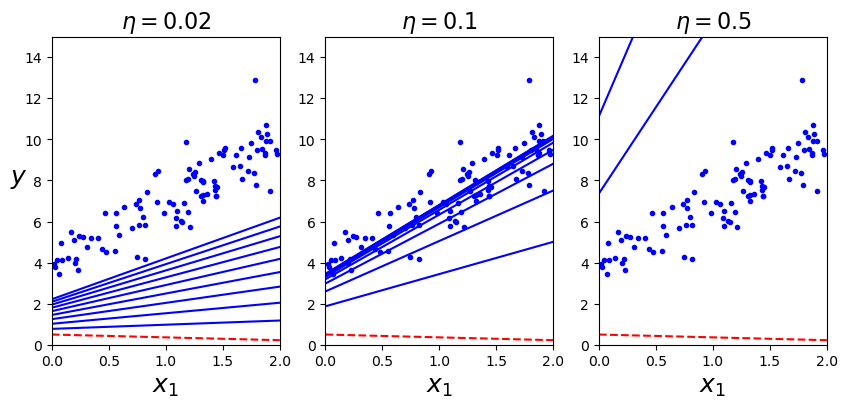

In [34]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

#### Anotação:

- Observa-se que quando a taxa de aprendizagem é muito pequena, pode levar mais tempo para chegar no ótimo global
- Quando a taxa de aprendizagem é muito grande, o algoritmo diverge, saltando cada vez mais distante da solução
- Usa sugestão é iniciar com o iniciar com uma grande quantidade de iterações e configurar  para o algoritmo parar quando o vetor gradiente se tornar muito pequeno, essa configuração é chamada de `tolerance`, isso acontece quando o algoritmo quando alcança o mínimo